In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 2.Load the Dataset

In [10]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [11]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 3.a)Univariate Analysis

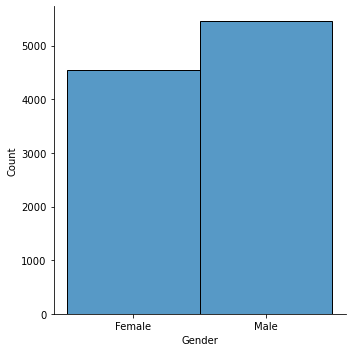

In [51]:

sns.displot(dataset.Gender)

# b) Bivariate Analysis

C:\Users\AK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

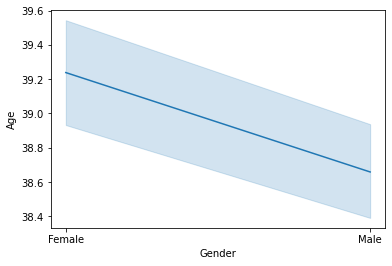

In [52]:

sns.lineplot(dataset.Gender,dataset.Age)

# c)Multivariate

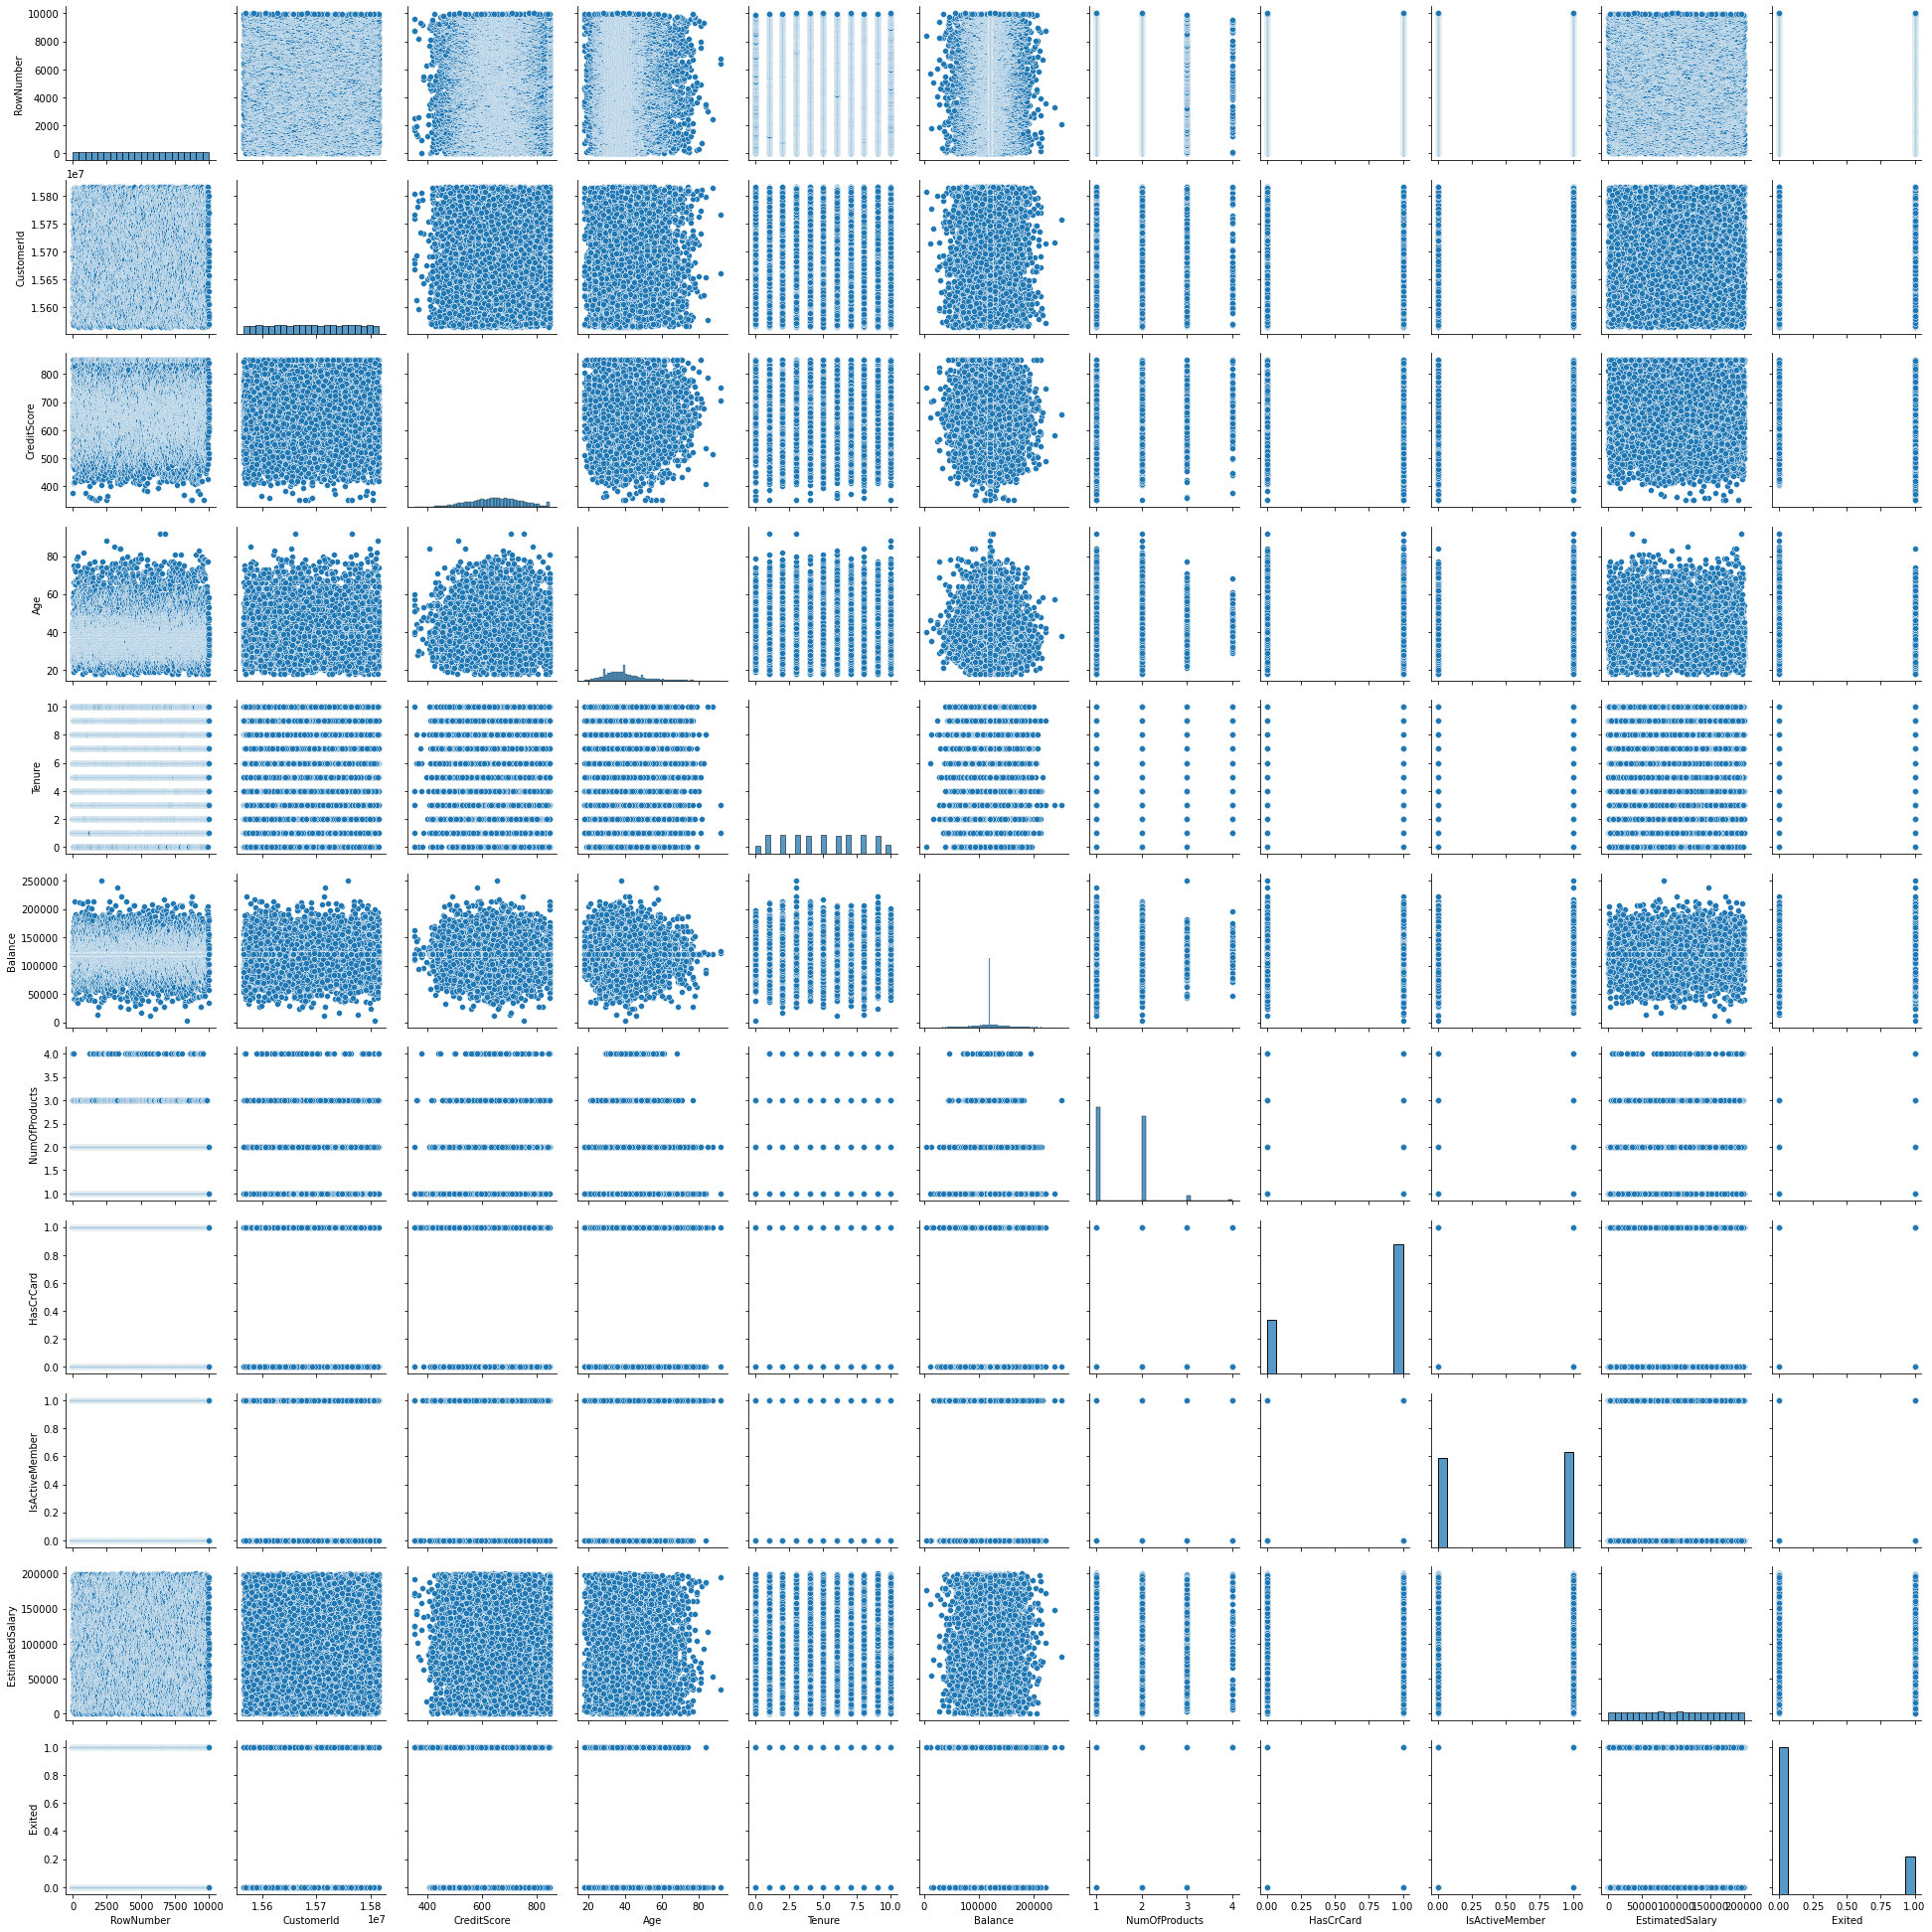

In [55]:
# pd.plotting.scatter_matrix(dataset,alpha=0.4,figsize=(20,20))
sns.pairplot(dataset)

# 4.Descriptive Statistics

In [28]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [49]:
dataset.mode()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,850.0,37.0,2.0,119827.493793,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
dataset.mean()

C:\Users\AK\AppData\Local\Temp\ipykernel_8720\1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Gender             5.457000e-01
Age                3.585080e+01
Tenure             5.012800e+00
Balance            1.198275e+05
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

# 5. Handling Missing Values

In [56]:
dataset.notnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [58]:


dataset.fillna(0)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,119827.493793,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,119827.493793,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,119827.493793,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,119827.493793,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


In [59]:

dataset.fillna(method='pad')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,119827.493793,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,119827.493793,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,119827.493793,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,119827.493793,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


In [60]:
dataset.fillna(method='bfill')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,119827.493793,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,119827.493793,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,119827.493793,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,119827.493793,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


# 6. Find the Outliers and Replace

In [64]:
qnt=dataset.quantile(q=(0.25,0.75))
iqr=qnt.loc[0.75]-qnt.loc[0.25]


In [65]:
iqr

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance             16063.1125
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [66]:
upper=qnt.loc[0.75]+1.5*iqr
upper

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            1.517389e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [67]:
lower=qnt.loc[0.25]-1.5*iqr
lower

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance            8.748646e+04
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

<AxesSubplot:xlabel='Age'>

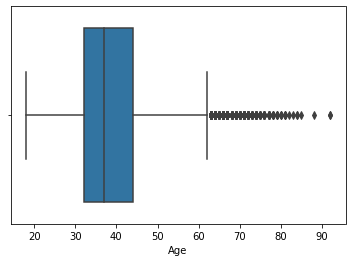

In [68]:
sns.boxplot(x=dataset['Age'])

<AxesSubplot:xlabel='Age'>

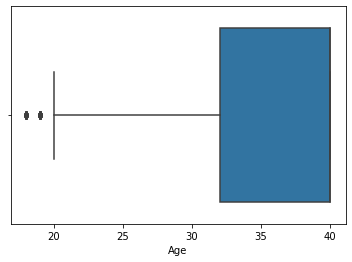

In [70]:
dataset["Age"]=np.where(dataset['Age']>35,40,dataset['Age'])
sns.boxplot(x=dataset['Age'])


# 7. Categorial Column and perform Encoding

In [71]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [72]:
dataset['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [73]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,40,2,119827.493793,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,40,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,40,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,40,1,119827.493793,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,40,2,125510.820000,1,1,1,79084.10,0


In [74]:
dataset['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

# 8.Split into Dependent and Independent Variables

In [77]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,3].values
x


array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [78]:
y

array([619, 608, 502, ..., 709, 772, 792], dtype=int64)

# 9.Scale Independent Variables

In [81]:
score=dataset[["CreditScore","EstimatedSalary"]]
scaler=StandardScaler()
scaler.fit(score)

StandardScaler()

# 10.Split Training and Testing Data

In [84]:
x,y=make_blobs(n_samples=1000)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(600, 2) (400, 2) (600,) (400,)
